Code inspired from `SciANN` github applications repo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sciann as sn

---------------------- SCIANN 0.6.8.6 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.9.3 
Python Version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)] 



## Generation synthetic dataset

* f(x) = sin(x)sin(y)

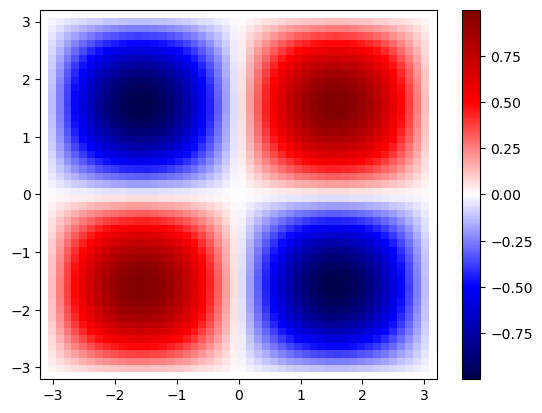

In [4]:
x_data, y_data = np.meshgrid(
    np.linspace(-np.pi, np.pi, 50), 
    np.linspace(-np.pi, np.pi, 50)
)
f_data = np.sin(x_data) * np.sin(y_data)
plt.pcolor(x_data, y_data, f_data, cmap='seismic');
plt.colorbar();

## Setting Neural Network

In [8]:
x= sn.Variable('x')
y= sn.Variable('y')
f= sn.Functional('f', [x,y], 4*[10], 'tanh')


* Since network has been initialised, initial state can be viewed as

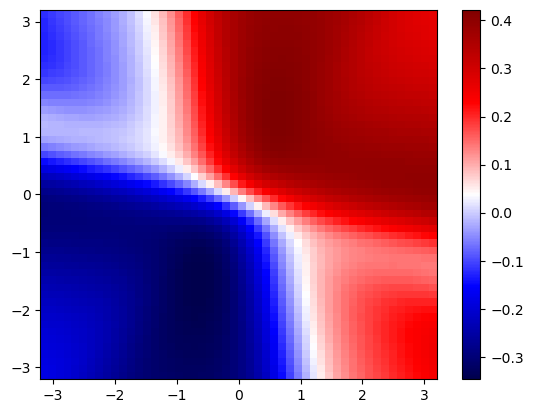

In [9]:
f_pred= f.eval([x_data, y_data])
im= plt.pcolor(x_data, y_data, f_pred, cmap='seismic')
plt.colorbar(im)

In [10]:
m= sn.SciModel([x,y], f, loss_func='mse', optimizer='adam')


In [11]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 y (InputLayer)                 [(None, 1)]          0           []                               
                                                                                                  
 concat_2 (Concatenate)         (None, 2)            0           ['x[0][0]',                      
                                                                  'y[0][0]']                      
                                                                                                  
 D10b_5 (Dense)                 (None, 10)           30          ['concat_2[0][0]']           

In [12]:
h= m.train([x_data, y_data], f_data, learning_rate=0.002, epochs=500, verbose=0)


Total samples: 2500 
Batch size: 64 
Total batches: 40 


Epoch 355: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.


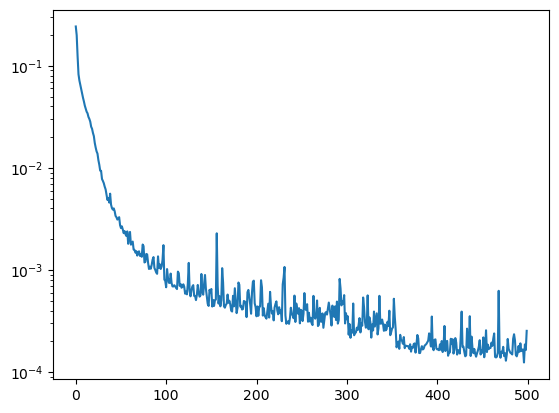

In [13]:
plt.semilogy(h.history['loss'])

* Generating `test data` to evaluate the data

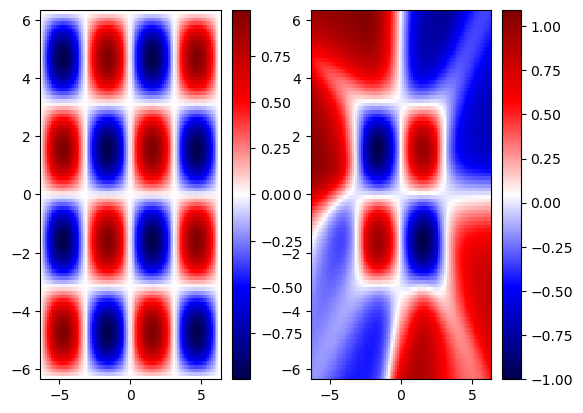

In [14]:
x_test, y_test = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 100), np.linspace(-2*np.pi, 2*np.pi, 100))
f_test = np.sin(x_test) * np.sin(y_test)

f_pred = f.eval([x_test, y_test])

fig, ax = plt.subplots(1, 2)

im = ax[0].pcolor(x_test, y_test, f_test, cmap='seismic')
plt.colorbar(im, ax=ax[0])

im = ax[1].pcolor(x_test, y_test, f_pred, cmap='seismic')
plt.colorbar(im, ax=ax[1])

* Using `Physics-informed Deep Learning`

In [42]:
sn.reset_session()
x= sn.Variable('x')
y=sn.Variable('y')
f=sn.Functional('f', [x,y], 4*[10], 'tanh')

### Defining objective functions and optimization model

In [43]:
L1= sn.rename(sn.math.diff(f, x, order=2)+sn.math.diff(f, y, order=2)+2*f, 'L1')

In [44]:
m= sn.SciModel([x, y], [f, L1], loss_func='mse', optimizer='adam')
h=m.train([x_data, y_data], [f_data, 'zeros'], learning_rate=0.001, epochs=1000, verbose=0)


Total samples: 2500 
Batch size: 64 
Total batches: 40 



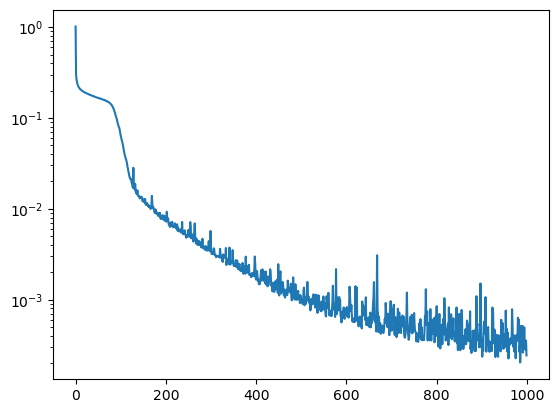

In [45]:
plt.semilogy(h.history['loss'])

## Testing the prediction using new network

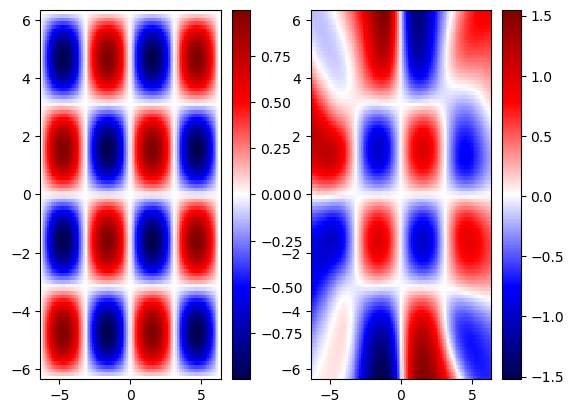

In [46]:
x_test, y_test = np.meshgrid(np.linspace(-2*np.pi, 2*np.pi, 100), np.linspace(-2*np.pi, 2*np.pi, 100))
f_test = np.sin(x_test) * np.sin(y_test)

f_pred = f.eval([x_test, y_test])

fig, ax = plt.subplots(1, 2)

im = ax[0].pcolor(x_test, y_test, f_test, cmap='seismic')
plt.colorbar(im, ax=ax[0])

im = ax[1].pcolor(x_test, y_test, f_pred, cmap='seismic')
plt.colorbar(im, ax=ax[1])

`PINN model has higher accuracy and predictive capabilities compared to the data-driven model.`